In [ ]:
pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stopwords.words('english')

import bs4 as bs
import urllib.request
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
scraped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Blacksmith')
article_black = scraped_data.read()

sport = urllib.request.urlopen('https://en.wikipedia.org/wiki/Premier_League')
article_sport = sport.read()

In [ ]:
parsed_article_black = bs.BeautifulSoup(article_black, 'lxml')
parsed_article_sport = bs.BeautifulSoup(article_sport, 'lxml')

In [ ]:
paragraphs_black = parsed_article_black.find_all('p')
paragraphs_sport = parsed_article_sport.find_all('p')

article_text_black = ""
article_text_sport = ""

for p in paragraphs_black:
  article_text_black += p.text

for k in paragraphs_sport:
  article_text_sport += k.text

In [ ]:
article_text_sport

'\nThe Premier League (legal name: The Football Association Premier League Limited) is the highest level of the men\'s English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL). Seasons typically run from August to May with each team playing 38 matches (playing all other teams both home and away).[1] Most games are played on Saturday and Sunday afternoons, with occasional weekday evening fixtures.[2]\nThe competition was founded as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League founded in 1888; however, teams may still be relegated into and promoted from the EFL Championship. The Premier League takes advantage of a lucrative television rights sale to Sky:[3] from 2019 to 2020, the league\'s accumulated television rights deals were worth around £3.1\xa0billion a year, with Sky and BT Group securing

In [ ]:
article_text_sport = re.sub(r'\[[0-9]*\]', ' ', article_text_sport)
article_text_sport = re.sub(r'\s+', ' ', article_text_sport)

article_text_black = re.sub(r'\[[0-9]*\]', ' ', article_text_black)
article_text_black = re.sub(r'\s+', ' ', article_text_black)

In [ ]:
article_text_sport

' The Premier League (legal name: The Football Association Premier League Limited) is the highest level of the men\'s English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL). Seasons typically run from August to May with each team playing 38 matches (playing all other teams both home and away). Most games are played on Saturday and Sunday afternoons, with occasional weekday evening fixtures. The competition was founded as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League founded in 1888; however, teams may still be relegated into and promoted from the EFL Championship. The Premier League takes advantage of a lucrative television rights sale to Sky: from 2019 to 2020, the league\'s accumulated television rights deals were worth around £3.1 billion a year, with Sky and BT Group securing the domestic 

In [ ]:
formatted_article_text_sport = re.sub(r'[^a-zA-Z]', ' ', article_text_sport)
formatted_article_text_sport = re.sub(r'\s+', ' ', formatted_article_text_sport)

formatted_article_text_black = re.sub(r'[^a-zA-Z]', ' ', article_text_black)
formatted_article_text_black = re.sub(r'\s+', ' ', formatted_article_text_black)

In [ ]:
formatted_article_text_sport

' The Premier League legal name The Football Association Premier League Limited is the highest level of the men s English football league system Contested by clubs it operates on a system of promotion and relegation with the English Football League EFL Seasons typically run from August to May with each team playing matches playing all other teams both home and away Most games are played on Saturday and Sunday afternoons with occasional weekday evening fixtures The competition was founded as the FA Premier League on February following the decision of clubs in the Football League First Division to break away from the Football League founded in however teams may still be relegated into and promoted from the EFL Championship The Premier League takes advantage of a lucrative television rights sale to Sky from to the league s accumulated television rights deals were worth around billion a year with Sky and BT Group securing the domestic rights to broadcast and games respectively The Premier 

In [ ]:
#kreiraj recenice
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

sentence_list_sport = nltk.sent_tokenize(article_text_sport)
sentence_list_black = nltk.sent_tokenize(article_text_black)

sentence_list_sport

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[" The Premier League (legal name: The Football Association Premier League Limited) is the highest level of the men's English football league system.",
 'Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL).',
 'Seasons typically run from August to May with each team playing 38 matches (playing all other teams both home and away).',
 'Most games are played on Saturday and Sunday afternoons, with occasional weekday evening fixtures.',
 'The competition was founded as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League founded in 1888; however, teams may still be relegated into and promoted from the EFL Championship.',
 "The Premier League takes advantage of a lucrative television rights sale to Sky: from 2019 to 2020, the league's accumulated television rights deals were worth around £3.1 billion a year, with Sky and BT Group sec

In [ ]:
def sport(sentence_list):
    dictionary = {}
    for sentence in sentence_list:
            dictionary[sentence] = "sport"
    return dictionary

def blacksmith(sentence_list):
    dictionary = {}
    for sentence in sentence_list:
            dictionary[sentence] = "blacksmith"
    return dictionary

In [ ]:
import csv

def save_sport_sentences_to_csv(sentence_list, file_name):
    sport_dict = sport(sentence_list)

    with open(file_name, 'w', newline='') as csvfile:
        fieldnames = ['word', 'type']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for sentence, is_sport in sport_dict.items():
            writer.writerow({'word': sentence, 'type': 'sport'})

def save_blacksmith_sentences_to_csv(sentence_list, file_name):
    blacksmith_dict = sport(sentence_list)

    with open(file_name, 'w', newline='') as csvfile:
        fieldnames = ['word', 'type']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for sentence, is_sport in blacksmith_dict.items():
            writer.writerow({'word': sentence, 'type': 'blacksmith'})

In [ ]:
sport(sentence_list_sport)
blacksmith(sentence_list_black)
save_sport_sentences_to_csv(sentence_list_sport, "sport_sentences.csv")
save_blacksmith_sentences_to_csv(sentence_list_black, "blacksmith_sentences.csv")

In [ ]:
import pandas as pd
import random

def merge_and_shuffle_csv(file1, file2, outfile):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    num_rows_df1 = len(df1)
    num_rows_df2 = len(df2)
    num_rows_to_include_from_each = min(num_rows_df1, num_rows_df2)

    if num_rows_to_include_from_each > num_rows_df1:
        df1_sampled = df1.sample(n=num_rows_to_include_from_each, replace=True, random_state=random.randint(0, 100))
        df2_sampled = df2.sample(n=num_rows_to_include_from_each, random_state=random.randint(0, 100))
    elif num_rows_to_include_from_each > num_rows_df2:
        df1_sampled = df1.sample(n=num_rows_to_include_from_each, random_state=random.randint(0, 100))
        df2_sampled = df2.sample(n=num_rows_to_include_from_each, replace=True, random_state=random.randint(0, 100))
    else:
        df1_sampled = df1.sample(n=num_rows_to_include_from_each, random_state=random.randint(0, 100))
        df2_sampled = df2.sample(n=num_rows_to_include_from_each, random_state=random.randint(0, 100))

    df_combined = pd.concat([df1_sampled, df2_sampled], ignore_index=True)

    df_shuffled = df_combined.sample(frac=1, random_state=random.randint(0, 100)).reset_index(drop=True)

    df_shuffled.to_csv(outfile, index=False)


In [ ]:
merge_and_shuffle_csv("/content/blacksmith_sentences.csv", "/content/sport_sentences.csv", "dataset.csv")

In [ ]:
data1 = pd.read_csv('dataset.csv')
data1.head()

import json

with open('/content/v11-recenice.json') as file:
  data2 =  json.load(file)
  

In [ ]:
data2

{'The FA cup is a meaningless competition.': 'sport',
 'Fernando Torres is the anchor of this front three.': 'sport',
 'Such a heavy anvil there.': 'blacksmith',
 "I've created a leather ball and kicked it around a bit.": 'sport',
 'I saw a gorgeous sword in the shop.': 'blacksmith',
 'Liverpool are really forge welding their own steel in the league this year.': 'sport'}

In [ ]:
data1

word        type
0    A smith would therefore frequently turn the ch...  blacksmith
1    As of the 2022–23 season, Canadian media right...       sport
2    Since the first Premier League season in 1992–...       sport
3    The earliest references of Tvastar can be foun...  blacksmith
4    The dressed metal goes back in the fire, is br...  blacksmith
..                                                 ...         ...
471  City was alleged of more than 100 violations d...       sport
472  Seppo Ilmarinen, the Eternal Hammerer, blacksm...  blacksmith
473  The UEFA Pro Licence is required by every pers...       sport
474            Springs must be made of hardened steel.  blacksmith
475  The hammering would continue—upsetting and the...  blacksmith

[476 rows x 2 columns]

In [ ]:
from bs4 import BeautifulSoup

cleantext = BeautifulSoup(data1["word"][1], 'lxml').text

In [ ]:
cleantext = re.sub('r[^\w\s]', '', cleantext)

In [ ]:
token = cleantext.lower().split()
stopword = set(stopwords.words('english'))
token_list = [word for word in token if word.lower() not in stopword]

In [ ]:
" ".join(token_list)

'2022–23 season, canadian media rights premier league owned fubotv, jointly owned sportsnet tsn, recently dazn.'

In [ ]:
#odavde
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
from tqdm import tqdm

def data_cleaner(data):

  clean_data = []

  for review in tqdm(data):
    cleantext = BeautifulSoup(review, 'lxml').text
    cleantext = re.sub(r'[^\w\s]', '', cleantext)
    cleantext = [token for token in cleantext.lower().split() if token not in stopword]
    cleantext = lemmatizer.lemmatize(" ".join(cleantext))
    clean_data.append(cleantext.strip())
  
  return clean_data

In [ ]:
clean_data = data_cleaner(data1.word.values)

  0%|          | 0/476 [00:00<?, ?it/s]<ipython-input-93-782fd352d5ad>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleantext = BeautifulSoup(review, 'lxml').text
100%|██████████| 476/476 [00:00<00:00, 2508.14it/s]


In [ ]:
clean_data[0]

'two lions found handles either side trophy third symbolised captain titlewinning team raises trophy gold crown head end season'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1, data1.type, test_size=0.2, random_state=42, stratify=data1.type)

y_train

141    blacksmith
208         sport
65          sport
78     blacksmith
165         sport
          ...    
348         sport
59          sport
243         sport
161         sport
265    blacksmith
Name: type, Length: 380, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
le_test = LabelEncoder()
y_test = le_test.fit_transform(y_test)

y_train

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(380, 2) (380,)
(96, 2) (96,)


In [ ]:
clean_data_train_data = data_cleaner(X_train.word.values)

  0%|          | 0/380 [00:00<?, ?it/s]<ipython-input-93-782fd352d5ad>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleantext = BeautifulSoup(review, 'lxml').text
100%|██████████| 380/380 [00:00<00:00, 3169.47it/s]


In [ ]:
X_train['cleaned_text'] = clean_data_train_data
X_train.head()

word        type  \
141  Welding is the joining of the same or similar ...  blacksmith   
208  At the time, paid television was an almost unt...       sport   
65   The three lowest placed teams in the Premier L...       sport   
78   During the 20th century various gases (natural...  blacksmith   
165  The FA released a report in June 1991, Bluepri...       sport   

                                          cleaned_text  
141                 welding joining similar kind metal  
208  time paid television almost untested propositi...  
65   three lowest placed teams premier league releg...  
78   20th century various gases natural gas acetyle...  
165  fa released report june 1991 blueprint future ...

In [ ]:
clean_data_test_data = data_cleaner(X_test.word.values)
X_test['cleaned_text'] = clean_data_test_data
X_test.head()

100%|██████████| 96/96 [00:00<00:00, 2972.60it/s]


word        type  \
85   The Premier League is the most-watched sports ...       sport   
404  Each material responds differently under the h...  blacksmith   
295  The Premier League Golden Boot is awarded each...       sport   
257  With a mix of drawing and upsetting the smith ...  blacksmith   
229  Manchester United won the inaugural edition of...       sport   

                                          cleaned_text  
85   premier league mostwatched sports league world...  
404  material responds differently hammer must sepa...  
295  premier league golden boot awarded season top ...  
257  mix drawing upsetting smith shapes faces final...  
229  manchester united inaugural edition new league...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer()
vec = vec.fit(X_train.cleaned_text)
train_x_bow = vec.transform(X_train.cleaned_text)
test_x_bow = vec.transform(X_test.cleaned_text)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier = MultinomialNB()

In [ ]:
alpha_ranges = {
    "alpha": [0.001, 0.01, 0.1, 1, 10.0, 100]
}

In [ ]:
grid_search = GridSearchCV(classifier, param_grid=alpha_ranges, scoring='accuracy', cv=3, return_train_score=True)
grid_search.fit(train_x_bow, y_train)

grid_search.cv_results_

{'mean_fit_time': array([0.00329216, 0.00196687, 0.00158397, 0.00164096, 0.00159939,
        0.00166321]),
 'std_fit_time': array([1.39545793e-03, 4.63285044e-04, 1.82140282e-05, 1.74391778e-05,
        2.09612586e-05, 2.13966562e-05]),
 'mean_score_time': array([0.00078591, 0.00062561, 0.00062132, 0.00058659, 0.00062609,
        0.00087897]),
 'std_score_time': array([1.48956267e-04, 1.44212039e-05, 1.48088457e-05, 4.05233662e-07,
        1.54512899e-05, 4.07449485e-04]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10.0, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10.0},
  {'alpha': 100}],
 'split0_test_score': array([0.96062992, 0.96062992, 0.95275591, 0.96062992, 0.96850394,
        0.96850394]),
 'split1_test_score': array([0.99212598, 0.99212598, 0.97637795, 0.97637795, 0.98425197,
        0.98425197

In [ ]:
alpha = [0.001, 0.01, 0.1, 1, 10.0, 100]

train_acc = grid_search.cv_results_['mean_train_score']
train_stdev = grid_search.cv_results_['std_train_score']

test_acc = grid_search.cv_results_['mean_test_score']
test_stdev = grid_search.cv_results_['std_test_score']

In [ ]:
import matplotlib.pyplot as plt

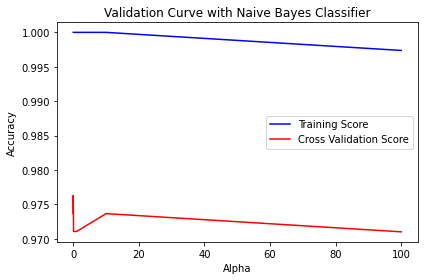

In [ ]:
plt.plot(alpha, train_acc, label="Training Score", color='b')
plt.plot(alpha, test_acc, label="Cross Validation Score", color='r')

plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
grid_search.best_estimator_

MultinomialNB(alpha=0.01)

In [ ]:
classifier = MultinomialNB(alpha=0.001)
classifier.fit(train_x_bow, y_train)

MultinomialNB(alpha=0.001)

In [ ]:
predict = classifier.predict(test_x_bow)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy is ", accuracy_score(y_test, predict))

Accuracy is  0.9895833333333334


In [ ]:
text = ["I hated the movie. It was bad"]
text_vec = vec.transform(text)
classifier.predict(text_vec)

array([0])

In [ ]:
le.inverse_transform([0])

array(['blacksmith'], dtype=object)

In [ ]:
# stopwords = nltk.corpus.stopwords.words('english')

# word_frequencies = {}

# for word in nltk.word_tokenize(formatted_article_text):

#   if word not in stopwords:

#     if word not in word_frequencies.keys():

#       word_frequencies[word] = 1
    
#     else:

#       word_frequencies[word] += 1

In [ ]:
#word_frequencies

In [ ]:
#

In [ ]:
#broj ponavljanja / frekvencija reci koja se najvise ponavlja

In [ ]:
# maximum_frequency = max(word_frequencies.values())

# for word in word_frequencies.keys():

#   word_frequencies[word] = (word_frequencies[word]/maximum_frequency)

In [ ]:
# sentence_scores = {}

# for sent in sentence_list:
#   for word in nltk.word_tokenize(sent.lower()):
#     if word in word_frequencies.keys():
#       if len(sent.split(' ')) < 30:
#         if sent not in sentence_scores.keys():
#           sentence_scores[sent] = word_frequencies[word]
#         else:
#           sentence_scores[sent] += word_frequencies[word]

In [ ]:
#sentence_scores

In [ ]:
# filtered = []

# text = re.sub(r'@\w+', '', text)
# text = re.sub(r'http\S+', '', text)
# text = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', text)  
# text = re.sub(r'[^\w\s]', '', text)   
# text = re.sub(r'#\w+', '', text) 
# text = text.lower()  
# words = word_tokenize(text) 
# stop_words = set(stopwords.words("english"))
# words = [word for word in words if word not in stop_words] 
# lemmatizer = WordNetLemmatizer()
# words = [lemmatizer.lemmatize(word) for word in words]
# text = " ".join(words)
# text = re.sub(r'\s+', ' ', text).strip()

# filtered.append(text)

In [ ]:
# filtered

['blacksmith metalsmith creates object primarily wrought iron steel sometimes metal forging metal using tool hammer bend cut cf tinsmith blacksmith produce object gate grille railing light fixture furniture sculpture tool agricultural implement decorative religious item cooking utensil weapon historical distinction heavy work blacksmith delicate operation whitesmith usually worked gold silver pewter finishing step fine steel1 place blacksmith work called variously smithy forge blacksmith shop']

In [ ]:
# import random

# global_dataset = []

# def determine_text_type(input_text):
#     if isinstance(input_text, list):
#         input_text = ' '.join(input_text)
#     if isinstance(input_text, str):
#         sentences = input_text.strip().split('.')
#     elif isinstance(input_text, tuple):
#         sentences = input_text[0]
#     else:
#         raise ValueError("Invalid input format. Input should be a string, list, or tuple.")
#     random.shuffle(sentences)
#     data = []
#     sport_count = 0
#     blacksmith_count = 0
#     for sentence in sentences:
#         if sport_count == len(sentences)//2 and blacksmith_count == len(sentences)//2:
#             break
#         words = sentence.lower().split()
#         if 'basketball' in words or 'football' in words or 'tennis' in words:
#             text_type = 'sport'
#             if sport_count < len(sentences)//2:
#                 sport_count += 1
#             else:
#                 continue
#         elif 'blacksmith' in words or 'metal' in words or 'hammer' in words:
#             text_type = 'blacksmith'
#             if blacksmith_count < len(sentences)//2:
#                 blacksmith_count += 1
#             else:
#                 continue
#         else:
#             text_type = 'unknown'
#         data.append({'text': sentence.strip(), 'text_type': text_type})
#     global_dataset.extend(data)
#     if not data:
#         print("No sentences found containing 'sport' or 'blacksmith'.")
#     return data



In [ ]:
# determine_text_type(filtered)

No sentences found containing 'sport' or 'blacksmith'.


[]